# rating 테이블 간단한 EDA

## 데이터 다운로드

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_row', 50)

In [8]:
train = pd.read_csv('../data/train_ratings.csv')
test = pd.read_csv('../data/test_ratings.csv')
print(train.shape)
print(test.shape)

(306795, 3)
(76699, 3)


In [3]:
train_counts = train.groupby('user_id')['rating'].count().sort_values(ascending=False)
test_counts = test.groupby('user_id')['rating'].count().sort_values(ascending=False)

## rating 관해서

In [4]:
print(len(train_counts))
print(len(test_counts))

59803
26167


train 데이터 사용자는 약 6만명, test 데이터 사용자는 약 2만 6천명 입니다.

In [5]:
len(set(test['user_id']) - set(train['user_id']))

8266

test 데이터 약 2만 6천명 중 8천명 정도는 train 내 없는 데이터 입니다.

좋은 모델을 위해선 cold start에 대한 대비가 필요합니다. 

다음으로 한 유저가 몇 권의 책을 읽는지 알아봅시다.

In [6]:
train_counts[:10]

user_id
11676     5520
98391     4560
189835    1503
153662    1496
23902      956
235105     812
76499      810
171118     771
16795      760
248718     747
Name: rating, dtype: int64

11676, 98391 두 사용자가 압도적인 독서량을 보입니다.

In [7]:
test_counts[:10]

user_id
11676     1419
98391     1125
189835     396
153662     347
23902      223
235105     208
76499      201
16795      198
248718     194
171118     189
Name: rating, dtype: int64

테스트 데이터도 train 데이터와 비슷한 사용자가 독서를 많이하는 경향을 보입니다.

이것으로 볼 때 train과 test는 시간 등의 기준 요소 없이 단순히 분할 되었음을 알 수 있습니다.

실제로 valid 데이터 셋을 만들 때 단순히 분할해도 큰 문제가 없을 것 같아요.

<AxesSubplot:>

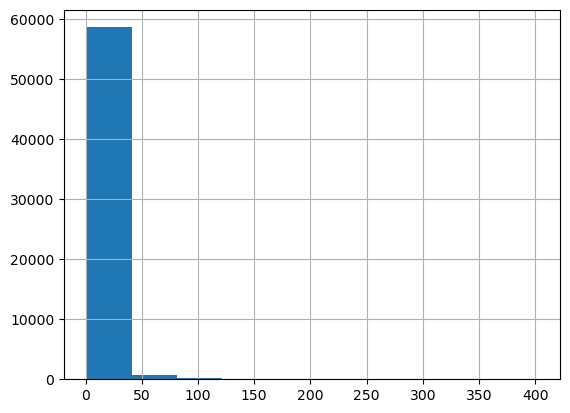

In [8]:
train_counts[20:].hist()

책을 극단적으로 많이 읽은 일부 인원을 제외한 분포입니다.

역시 대부분에 인원은 50권 이상 책을 읽긴 힘들군요. 당연한 결과입니다.

In [9]:
n = 5
_ratio = np.round(len(train_counts[train_counts < n]) / len(train_counts), 3) * 100
print(f'책을 {n}권 이하로 읽은 사람의 비율은 {_ratio} 입니다.')

책을 5권 이하로 읽은 사람의 비율은 82.1 입니다.


조금 더 상세한 수치를 알 수 있는 코드입니다. 대부분 인원은 책을 몇권 안 읽었습니다.

## 책에 관해서

In [4]:
books = pd.read_csv('../data/books.csv')
books.drop(['img_url', 'img_path'], axis = 1, inplace = True)
books.sample(5)

,isbn,book_title,book_author,year_of_publication,publisher,language,category,summary
10794,0679723285,China Men (Vintage International (Paperback)),MAXINE HONG KINGSTON,1989.0,Vintage,en,['History'],The author chronicles the lives of three gener...
37849,0449909735,Dave Barry Is Not Making This Up,Dave Barry,1995.0,Ballantine Books,en,['Humor'],THE NEW YORK TIMES BESTSELLER YOU CAN&#39;T MA...
139429,1573245097,The Art of Pilgrimage: The Seeker's Guide to M...,Phil Cousineau,2000.0,Conari Press,NaN,NaN,NaN
91019,0876859147,Screams from the Balcony: Selected Letters 196...,Charles Bukowski,1993.0,Ecco,en,['Fiction'],Screams from the Balcony is a collection of le...
89472,0393314030,The Freud Reader,Sigmund Freud,1995.0,W. W. Norton & Company,en,['Psychology'],Provides fifty-one texts spanning Freud&#39;s ...


In [90]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 149570 non-null  object 
 1   book_title           149570 non-null  object 
 2   book_author          149570 non-null  object 
 3   year_of_publication  149570 non-null  float64
 4   publisher            149570 non-null  object 
 5   language             82343 non-null   object 
 6   category             80719 non-null   object 
 7   summary              82343 non-null   object 
dtypes: float64(1), object(7)
memory usage: 9.1+ MB


### 작가

In [91]:
n = 1
print('작가의 수 :', books['book_author'].nunique())
books_authors = books.groupby('book_author')['isbn'].count().sort_values(ascending=False)
print(f'{n}권 이상 집필한 작가의 수 :', len(books_authors[books_authors > n]))
# 1권 쓴 작가들은 어떻게 할까??..

작가의 수 : 62059
1권 이상 집필한 작가의 수 : 19029


### 출판사

![image](https://user-images.githubusercontent.com/79916736/197498312-c2e08d6c-262f-4ae3-bcad-d985f967cf3b.png)


In [92]:
n = 1
print('출판사의 수 :', books['publisher'].nunique())
books_publishers = books.groupby('publisher')['isbn'].count().sort_values(ascending=False)
print(f'{n}권 이상 집필한 출판사의 수 :', len(books_publishers[books_publishers == n]))
# 1권 출판한 출판사는 좀..

출판사의 수 : 11571
1권 이상 집필한 출판사의 수 : 6295


In [93]:
tem = books[books['publisher'].str.contains('Harlequin')]

# tem_num = set(tem['isbn'])
# train_t = train[(train['user_id'] == 11676)]
# train_t = train_t[train_t['isbn'].isin(tem_num)]
# train_t['rating'].value_counts()

set(tem['publisher'])

{'Harlequin',
 'Harlequin Audio',
 'Harlequin Books',
 'Harlequin Enterprises',
 'Harlequin Enterprises Limited',
 'Harlequin Mills & Boon Ltd',
 'Harlequin Romance',
 'Harlequin Sales Corp',
 'Harlequin Sales Corp (Mm)'}

In [94]:
books_publishers[:10]

publisher
Harlequin                   3005
Ballantine Books            2322
Pocket                      2274
Penguin Books               1943
Bantam Books                1938
Berkley Publishing Group    1754
Silhouette                  1684
Warner Books                1667
Scholastic                  1586
Simon & Schuster            1578
Name: isbn, dtype: int64

In [95]:
for i in books_publishers[books_publishers > 20].index:
    books['publisher'][books['publisher'].str.contains(i)] = i

books.to_csv("../data/books_ksy.csv", index = False)

n = 10
print('출판사의 수 :', books['publisher'].nunique())
books_publishers = books.groupby('publisher')['isbn'].count().sort_values(ascending=False)
print(f'{n}권 이상 집필한 출판사의 수 :', len(books_publishers[books_publishers >= n]))

출판사의 수 : 10267
10권 이상 집필한 출판사의 수 : 1216


In [96]:
books_publishers[:10]

publisher
Penguin                     4640
Bantam                      4514
Random House                3513
Harlequin                   3157
Pocket                      2845
Scholastic                  2570
Ballantine Books            2348
Warner Books                2080
Simon & Schuster            2011
Berkley Publishing Group    1755
Name: isbn, dtype: int64

In [97]:
books_publishers[books_publishers < 5]
# 약 8천개의 출판사들 정리가 필요할듯?

publisher
Raintree                         4
DaCapo Press                     4
Dearborn Financial Publishing    4
Scepter Pubs                     4
Soho Crime                       4
                                ..
ICS Press                        1
IAS Training                     1
IANA                             1
I.P.A.C.S.                       1
Ã?lbaum                          1
Name: isbn, Length: 8169, dtype: int64

### 출판연도

In [5]:
books['year_of_publication'].value_counts()
# 쓰여진 연도가 총 95개. 일부 이상한 연도는 수작업으로 가능할듯(1378년?)
# 다만 연도가 평점과 상관이 있을까??

2002.0    11669
2001.0    11020
1999.0    10480
2000.0    10391
2003.0     9430
          ...  
1378.0        1
1900.0        1
2006.0        1
1926.0        1
1934.0        1
Name: year_of_publication, Length: 95, dtype: int64

In [6]:
books['year_of_publication'].sort_values(ascending=True)

121860    1376.0
104259    1378.0
129205    1806.0
97563     1900.0
132721    1901.0
           ...  
55618     2005.0
92507     2005.0
104529    2005.0
79497     2005.0
81822     2006.0
Name: year_of_publication, Length: 149570, dtype: float64

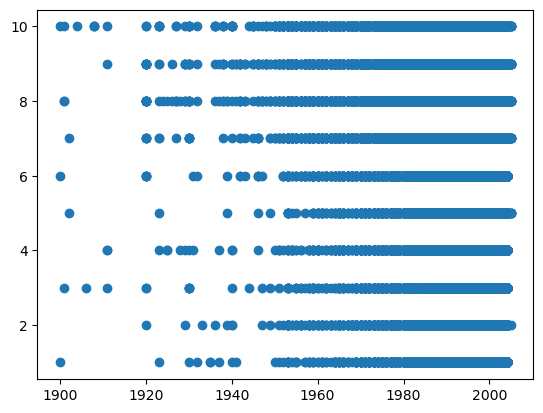

In [9]:
# 평점과 출판연도간 상관관계를 알아보려고 함
book_rating = pd.merge(train,books, how='right',on='isbn')
book_rating.dropna(subset=['rating'], inplace = True)
book_rating['year_of_publication'][book_rating['year_of_publication'] < 1900] = 1900
plt.scatter(book_rating['year_of_publication'], book_rating['rating'])
# 산점도로는 보기 힘든데 더 좋은 시각화 방법이 있으면 공유 부탁

In [10]:
book_rating['year_of_publication'].corr(book_rating['rating'])

-0.004389969335149862

In [13]:
pred = 1900
for i in [1970, 1980, 1990, 2000, 2020]:
    tem = book_rating['rating'][(book_rating['year_of_publication'] < i) & (book_rating['year_of_publication'] > pred)]
    _mean = tem.mean()
    cnt =  len(tem)
    print(f'{pred} ~ {i} 까지 출판된 책 {cnt} 개의 평균 평점은 {_mean} 입니다.')
    pred = i
# 20년 단위로 이정도 분할하는건 약간의 효과가 있을수도.
# 대부분의 책은 1980년 이후에 쓰였음을 알 수 있음.

1900 ~ 1970 까지 출판된 책 2469 개의 평균 평점은 7.50546780072904 입니다.
1970 ~ 1980 까지 출판된 책 7208 개의 평균 평점은 7.227802441731409 입니다.
1980 ~ 1990 까지 출판된 책 36409 개의 평균 평점은 7.0839352907248205 입니다.
1990 ~ 2000 까지 출판된 책 140308 개의 평균 평점은 7.000356358867634 입니다.
2000 ~ 2020 까지 출판된 책 87570 개의 평균 평점은 7.167842868562293 입니다.


### 책 언어

In [103]:
book_rating['language'].value_counts() # 대부분 영어?

en       182282
de         2226
es         1486
fr         1175
it          296
nl           81
pt           56
da           43
ca           23
ms           10
ru           10
no            5
zh-CN         3
ja            3
la            3
el            1
ro            1
fa            1
eo            1
ga            1
vi            1
zh-TW         1
ko            1
gl            1
Name: language, dtype: int64

In [104]:
book_rating['rating'][book_rating['language'] != 'en'].mean()
# 영어 아닐때

7.0413932681728015

In [105]:
book_rating['rating'][book_rating['language'] == 'en'].mean()
# 영어 일때

7.089059808428698

In [106]:
book_rating['rating'][book_rating['language'].isna()].mean()
# null 일때

7.048545564475496

In [122]:
book_rating.groupby('language')['rating'].count().sort_values(ascending=False)

language
en       182282
de         2226
es         1486
fr         1175
it          296
nl           81
pt           56
da           43
ca           23
ru           10
ms           10
no            5
la            3
zh-CN         3
ja            3
ko            1
gl            1
ga            1
fa            1
ro            1
eo            1
vi            1
el            1
zh-TW         1
Name: rating, dtype: int64

In [123]:
print('책 전체 평균 평점은', book_rating['rating'].mean())
for i in book_rating.groupby('language')['rating'].count().sort_values(ascending=False).index:
    tem = book_rating['rating'][book_rating['language'] == i]
    _mean = tem.mean()
    cnt = tem.count()
    print(f'{i} 언어 책은 {cnt}개로 평균 평점은 {_mean}')

tem = book_rating['rating'][book_rating['language'].isna()]
_mean = tem.mean()
cnt = tem.count()
print(f'NULL 언어 책은 {cnt}개로 평균 평점은 {_mean}')

책 전체 평균 평점은 7.069714304340032
en 언어 책은 182282개로 평균 평점은 7.089059808428698
de 언어 책은 2226개로 평균 평점은 6.662623539982031
es 언어 책은 1486개로 평균 평점은 6.917900403768506
fr 언어 책은 1175개로 평균 평점은 7.12
it 언어 책은 296개로 평균 평점은 7.398648648648648
nl 언어 책은 81개로 평균 평점은 6.061728395061729
pt 언어 책은 56개로 평균 평점은 7.767857142857143
da 언어 책은 43개로 평균 평점은 7.674418604651163
ca 언어 책은 23개로 평균 평점은 6.130434782608695
ru 언어 책은 10개로 평균 평점은 8.0
ms 언어 책은 10개로 평균 평점은 6.2
no 언어 책은 5개로 평균 평점은 5.2
la 언어 책은 3개로 평균 평점은 8.666666666666666
zh-CN 언어 책은 3개로 평균 평점은 8.666666666666666
ja 언어 책은 3개로 평균 평점은 7.0
ko 언어 책은 1개로 평균 평점은 7.0
gl 언어 책은 1개로 평균 평점은 7.0
ga 언어 책은 1개로 평균 평점은 7.0
fa 언어 책은 1개로 평균 평점은 10.0
ro 언어 책은 1개로 평균 평점은 9.0
eo 언어 책은 1개로 평균 평점은 8.0
vi 언어 책은 1개로 평균 평점은 8.0
el 언어 책은 1개로 평균 평점은 6.0
zh-TW 언어 책은 1개로 평균 평점은 9.0
NULL 언어 책은 119084개로 평균 평점은 7.048545564475496


### 카테고리

In [108]:
import re
books.loc[books[books['category'].notnull()].index, 'category'] = books[books['category'].notnull()]['category'].apply(lambda x: re.sub('[\W_]+',' ',x).strip())
# 미션 1 코드 사용, 대괄호 밖으로 빼는 과정.

In [109]:
books['category'] = books['category'].str.lower()
books['category'].value_counts()

fiction                                            33016
juvenile fiction                                    5835
biography autobiography                             3326
history                                             1927
religion                                            1818
                                                   ...  
brenner simon fictitious character                     1
gone with the wind motion picture 1939                 1
disguise                                               1
country lawyers                                        1
authors canadian english 20th century biography        1
Name: category, Length: 4105, dtype: int64

In [125]:
categories = ['garden','crafts','physics','adventure','music','fiction','nonfiction','science','science fiction','social','homicide',
 'sociology','disease','religion','christian','philosophy','psycholog','mathemat','agricult','environmental',
 'business','poetry','drama','literary','travel','motion picture','children','cook','literature','electronic',
 'humor','animal','bird','photograph','computer','house','ecology','family','architect','camp','criminal','language','india']

books['category_high'] = books['category'].copy()
for category in categories:
    books.loc[books[books['category'].str.contains(category,na=False)].index,'category_high'] = category

In [126]:
category_high_df = pd.DataFrame(books['category_high'].value_counts()).reset_index()
category_high_df.columns = ['category','count']
others_list = category_high_df[category_high_df['count']<5]['category'].values
books.loc[books[books['category_high'].isin(others_list)].index, 'category_high']='others'
print(books['category'].nunique())
print(books['category_high'].nunique())

4105
415


In [127]:
book_rating = pd.merge(train,books, how='right',on='isbn')
book_rating.dropna(subset=['rating'], inplace = True)
print('책 전체 평균 평점은', book_rating['rating'].mean())
for i in book_rating.groupby('category_high')['rating'].count().sort_values(ascending=False).index:
    tem = book_rating['rating'][book_rating['category_high'] == i]
    _mean = tem.mean()
    cnt = tem.count()
    print(f'{i} 언어 책은 {cnt}개로 평균 평점은 {_mean}')

tem = book_rating['rating'][book_rating['category_high'].isna()]
_mean = tem.mean()
cnt = tem.count()
print(f'NULL 언어 책은 {cnt}개로 평균 평점은 {_mean}')

책 전체 평균 평점은 7.069714304340032
fiction 언어 책은 122890개로 평균 평점은 7.036463503946619
biography autobiography 언어 책은 7693개로 평균 평점은 7.244248017678409
others 언어 책은 6023개로 평균 평점은 6.96397144280259
humor 언어 책은 3378개로 평균 평점은 7.3303730017761985
history 언어 책은 2740개로 평균 평점은 7.290875912408759
religion 언어 책은 2408개로 평균 평점은 7.399086378737541
body mind spirit 언어 책은 1738개로 평균 평점은 7.2025316455696204
social 언어 책은 1682개로 평균 평점은 7.033293697978597
nonfiction 언어 책은 1679개로 평균 평점은 7.322215604526503
business 언어 책은 1670개로 평균 평점은 6.8293413173652695
family 언어 책은 1566개로 평균 평점은 6.941890166028097
science 언어 책은 1451개로 평균 평점은 7.126119917298415
self help 언어 책은 1394개로 평균 평점은 7.041606886657102
health fitness 언어 책은 1290개로 평균 평점은 6.924031007751938
literary 언어 책은 1254개로 평균 평점은 7.067783094098884
cook 언어 책은 1177개로 평균 평점은 7.452846219201359
travel 언어 책은 1032개로 평균 평점은 7.216085271317829
psycholog 언어 책은 1013개로 평균 평점은 6.818361303060217
poetry 언어 책은 1000개로 평균 평점은 7.511
language 언어 책은 975개로 평균 평점은 7.288205128205128
drama 언어 책은 840개로 평균 평점은 7

카테고리 변수는 꽤 중요할지도 모릅니다.

## User에 관해

In [29]:
users = pd.read_csv('../data/users.csv')

In [30]:
users['location'] = users['location'].str.replace(r'[^0-9a-zA-Z:,]', '') # 특수문자 제거

# 지역, 주, 국가
users['location_city'] = users['location'].apply(lambda x: x.split(',')[0].strip())
users['location_state'] = users['location'].apply(lambda x: x.split(',')[1].strip())
users['location_country'] = users['location'].apply(lambda x: x.split(',')[2].strip())

users = users.replace('na', np.nan) #특수문자 제거로 n/a가 na로 바뀌게 되었습니다. 따라서 이를 컴퓨터가 인식할 수 있는 결측값으로 변환합니다.
users = users.replace('', np.nan) # 일부 경우 , , ,으로 입력된 경우가 있었으므로 이런 경우에도 결측값으로 변환합니다.

# 도시는 존재하는데 나라 정보가 없는 경우 채워주는 코드
modify_location = users[(users['location_country'].isna())&(users['location_city'].notnull())]['location_city'].values
location = users[(users['location'].str.contains('seattle'))&(users['location_country'].notnull())]['location'].value_counts().index[0]

location_list = []
for location in modify_location:
    try:
        right_location = users[(users['location'].str.contains(location))&(users['location_country'].notnull())]['location'].value_counts().index[0]
        location_list.append(right_location)
    except:
        pass

for location in location_list:
    users.loc[users[users['location_city']==location.split(',')[0]].index,'location_state'] = location.split(',')[1]
    users.loc[users[users['location_city']==location.split(',')[0]].index,'location_country'] = location.split(',')[2]

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           68092 non-null  int64  
 1   location          68092 non-null  object 
 2   age               40259 non-null  float64
 3   location_city     67970 non-null  object 
 4   location_state    66960 non-null  object 
 5   location_country  67821 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.1+ MB


age는 결측치가 많습니다.

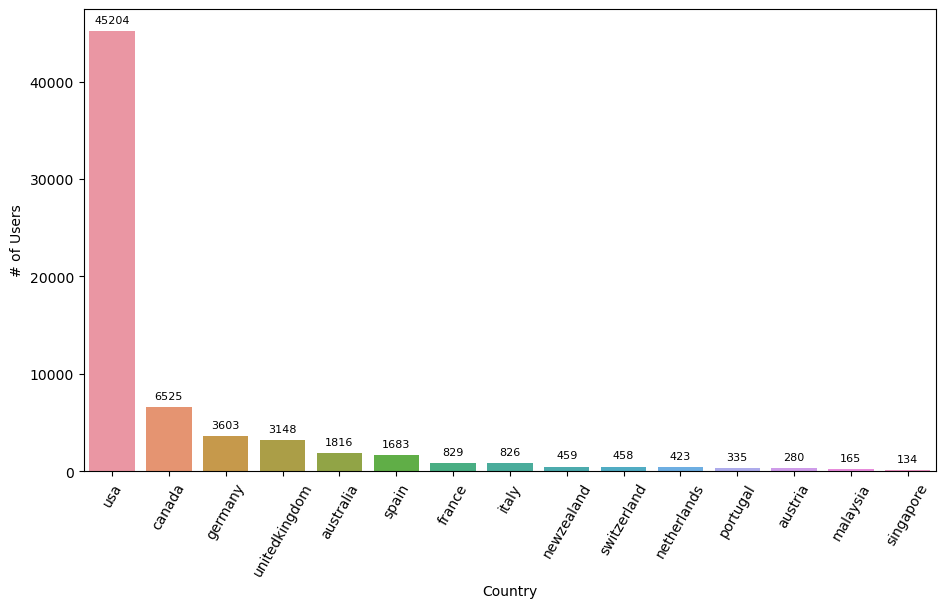

In [138]:
my_dict=(users['location_country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['location_country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
# f.drop(7,inplace=True)
fig=plt.figure(figsize=(11,6))
ax = sns.barplot(y = 'count',x= 'location_country' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.xlabel("Country", size=10)
plt.ylabel("# of Users", size=10)
plt.show()

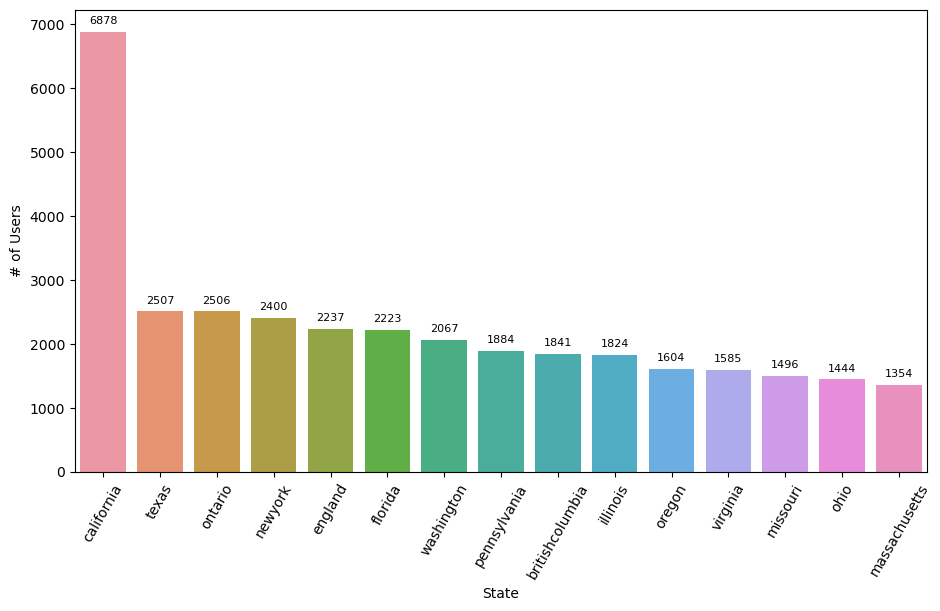

In [141]:
my_dict=(users['location_state'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['location_state','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
# f.drop(7,inplace=True)
fig=plt.figure(figsize=(11,6))
ax = sns.barplot(y = 'count',x= 'location_state' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.xlabel("State", size=10)
plt.ylabel("# of Users", size=10)
plt.show()

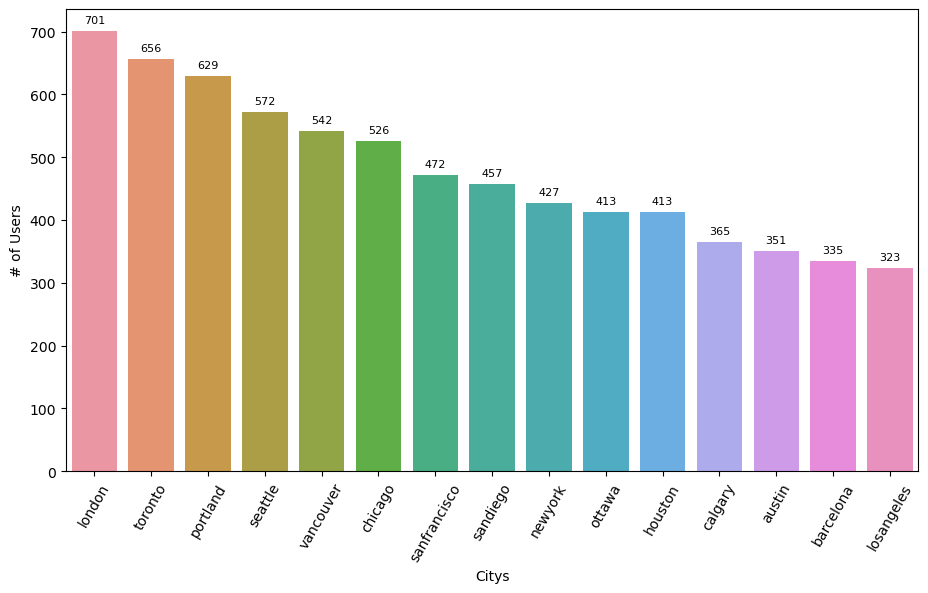

In [142]:
my_dict=(users['location_city'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['location_city','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
# f.drop(7,inplace=True)
fig=plt.figure(figsize=(11,6))
ax = sns.barplot(y = 'count',x= 'location_city' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.xlabel("Citys", size=10)
plt.ylabel("# of Users", size=10)
plt.show()

In [144]:
print(users['location_country'].nunique())
print(users['location_state'].nunique())
print(users['location_city'].nunique())

268
1323
11994


나라로 나누게 되면 미국은 너무 많은 집단이 묶이게 되고 도시로 하면 지나치게 많은 범주가 생깁니다.

주를 잘 전치리 해서 사용하는게 베스트 아닐까요?

물론 다양한 버전으로 실험해볼 생각입니다.

In [158]:
tem = users['location_state'].value_counts()
tem[tem > 10]

california       6878
texas            2507
ontario          2506
newyork          2400
england          2237
                 ... 
fribourg           11
crdoba             11
hampshire          11
catalua            11
paysdelaloire      11
Name: location_state, Length: 213, dtype: int64

In [153]:
user_rating = pd.merge(train,users, how='right',on='user_id')
user_rating.dropna(subset=['rating'], inplace = True)
print('책 전체 평균 평점은', book_rating['rating'].mean())
for i in user_rating[user_rating['location_country'] == 'canada'].groupby('location_state')['rating'].count().sort_values(ascending=False).index:
    tem = user_rating['rating'][user_rating['location_state'] == i]
    _mean = tem.mean()
    cnt = tem.count()
    print(f'{i} 언어 책은 {cnt}개로 평균 평점은 {_mean}')

tem = user_rating['rating'][user_rating['location_state'].isna()]
_mean = tem.mean()
cnt = tem.count()
print(f'NULL 언어 책은 {cnt}개로 평균 평점은 {_mean}')

책 전체 평균 평점은 7.069714304340032
ontario 언어 책은 13283개로 평균 평점은 6.961228638108861
britishcolumbia 언어 책은 5830개로 평균 평점은 6.785763293310463
alberta 언어 책은 4383개로 평균 평점은 6.878165639972622
quebec 언어 책은 1589개로 평균 평점은 7.040906230333543
novascotia 언어 책은 1217개로 평균 평점은 7.066557107641742
newbrunswick 언어 책은 1136개로 평균 평점은 6.680457746478873
saskatchewan 언어 책은 741개로 평균 평점은 7.207827260458839
manitoba 언어 책은 589개로 평균 평점은 7.448217317487266
newfoundland 언어 책은 303개로 평균 평점은 6.4983498349834985
yukonterritory 언어 책은 119개로 평균 평점은 5.436974789915967
princeedwardisland 언어 책은 56개로 평균 평점은 8.035714285714286
northwestterritories 언어 책은 23개로 평균 평점은 6.6521739130434785
qubec 언어 책은 16개로 평균 평점은 7.25
rhodeisland 언어 책은 662개로 평균 평점은 7.016616314199395
delaware 언어 책은 540개로 평균 평점은 7.344444444444444
nunavut 언어 책은 6개로 평균 평점은 6.833333333333333
abruzzo 언어 책은 17개로 평균 평점은 7.117647058823529
travelling 언어 책은 5개로 평균 평점은 8.6
yukon 언어 책은 3개로 평균 평점은 4.333333333333333
bc 언어 책은 7개로 평균 평점은 6.714285714285714
newjersey 언어 책은 5627개로 평균 평점은 7.038030922338

In [242]:
def _fillna(x):
    if pd.isna(x['location_country']):
        # 만약 나라가 기록 안되있는 경우        
        if pd.isna(x['location_city']):
            # 도시까지 없다면 모든 정보가 없음. 최빈값 california 사용.
            return 'california'
        else:
            tem = users['location_state'][users['location_city'] == x['location_city']].value_counts()
            if len(tem) == 0: 
                # 만약 주 이름이 없는 도시이면 주이름을 주 이름으로 사용.
                return x['location_city'] 
            else:
                # 그 도시에서 가장 자주 쓰이는 주 이름 사용.
                return tem.index[0]

    else:
        tem = users['location_state'][users['location_country'] == x['location_country']].value_counts()
        if len(tem) == 0: 
            # 만약 주 이름이 없는 나라이면 나라이름을 주 이름으로 사용.
            return x['location_country'] 
        else:
            # 그 나라에서 가장 자주 쓰이는 주 이름 사용.
            return tem.index[0]


In [243]:
users['fix_location_state'] = users.apply(lambda x : _fillna(x) if pd.isna(x['location_state']) else x['location_state'], axis = 1)

In [244]:
users[users['location_country'] == 'aruba']

,user_id,location,age,location_city,location_state,location_country,fix_location_state
633,271622,"malmok,na,aruba",NaN,malmok,NaN,aruba,aruba
6632,60081,"malmok,na,aruba",NaN,malmok,NaN,aruba,aruba
47152,247783,"na,na,aruba",14.0,NaN,NaN,aruba,aruba


In [252]:
tem = users['fix_location_state'].value_counts()
tem[tem > 10]

california       6976
ontario          2520
texas            2507
newyork          2402
england          2298
                 ... 
catalua            11
crdoba             11
paysdelaloire      11
hampshire          11
fribourg           11
Name: fix_location_state, Length: 222, dtype: int64

In [174]:
users.groupby('location_country')['user_id'].count().sort_values(ascending=True)[:20].index

Index(['aberdeenshire', 'madagascar', 'massachusetts', 'metromanila',
       'middlesex', 'minnesota', 'mongolia', 'montana', 'mozambique',
       'naontheroad', 'newbrunswick', 'newfoundland', 'newhampshire',
       'newjersey', 'newmexico', 'niedersachsen', 'northyorkshire',
       'nottinghamshire', 'zambia', 'losestadosunidosdenorteamerica'],
      dtype='object', name='location_country')

In [31]:
user_rating = pd.merge(train,users, how='right',on='user_id')
user_rating.dropna(subset=['rating'], inplace = True)

In [32]:
pred = 0
for i in [10, 20, 30, 35, 40, 50, 100]:
    tem = user_rating['rating'][(user_rating['age'] < i) & (user_rating['age'] > pred)]
    _mean = tem.mean()
    cnt =  len(tem)
    print(f'{pred} ~ {i} 까지 출판된 책 {cnt} 개의 평균 평점은 {_mean} 입니다.')
    pred = i

tem = user_rating['rating'][user_rating['age'].isna()]
_mean = tem.mean()
cnt = tem.count()
print(f'NULL 나이 책은 {cnt}개로 평균 평점은 {_mean}')

0 ~ 10 까지 출판된 책 623 개의 평균 평점은 6.73354735152488 입니다.
10 ~ 20 까지 출판된 책 12034 개의 평균 평점은 7.111268073790925 입니다.
20 ~ 30 까지 출판된 책 53141 개의 평균 평점은 7.248565138029017 입니다.
30 ~ 35 까지 출판된 책 30681 개의 평균 평점은 7.033343111371859 입니다.
35 ~ 40 까지 출판된 책 22746 개의 평균 평점은 7.155236085465576 입니다.
40 ~ 50 까지 출판된 책 38489 개의 평균 평점은 7.261295435059368 입니다.
50 ~ 100 까지 출판된 책 33299 개의 평균 평점은 7.386738340490705 입니다.
NULL 나이 책은 92662개로 평균 평점은 6.735403941205672


In [36]:
user_rating['rating'][(user_rating['age'].isna()) & (user_rating['location_state'].isna())].mean()

6.761904761904762